# Data Classification (k-Nearest Neighbor)



> 6131501040: Patsagon Saechin

> 6131501059: Sahadsawat Khadpoon



In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_tcas_v2.xlsx to cleaned_tcas_v2.xlsx


### Problem: Predicting the Status of Student from the data below

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# load the data
df = pd.read_excel('cleaned_tcas_v2.xlsx')
df.sample(20)

,Sex,FacultyName,HomeRegion,Status,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
7668,Female,School of Social Innovation,East,Not MFU student,3.26,3.38,2.73,3.00,3.52,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0
2364,Female,School of Management,South,Not MFU student,3.20,3.63,2.28,3.38,3.11,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5208,Female,School of Management,North,Not MFU student,3.26,3.20,2.50,3.25,3.54,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0
7607,Female,School of Information Technology,South,Not MFU student,3.83,3.96,3.00,3.10,3.85,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0
2762,Female,School of Management,Central,Not MFU student,3.32,3.75,2.83,3.07,3.68,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0
4793,Female,School of Integrative Medicine,North East,MFU student,3.28,3.57,2.66,2.81,3.66,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0
7075,Male,School of Sinology,North,Not MFU student,2.87,2.50,2.20,2.75,3.12,1,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0
4969,Male,School of Management,Central,Not MFU student,2.94,2.60,2.10,2.50,2.94,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1
1606,Female,School of Management,East,Not MFU student,3.87,3.95,3.89,3.77,3.95,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
36,Male,School of Liberal Arts,North,MFU student,3.81,3.82,3.50,3.54,3.83,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0


In [5]:
df.columns

Index(['Sex', 'FacultyName', 'HomeRegion', 'Status', 'GPAX', 'GPA_Eng',
       'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42'],
      dtype='object')

In [7]:
# check missing values
df.isnull().sum()

Sex            1
FacultyName    1
HomeRegion     1
Status         1
GPAX           0
GPA_Eng        0
GPA_Math       0
GPA_Sci        0
GPA_Sco        0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
dtype: int64

In [8]:
# fill missing value with mode
df[['Sex']]= df.Sex.fillna(df.Sex.mode()[0]) 
df[['FacultyName']]= df.FacultyName.fillna(df.FacultyName.mode()[0]) 
df[['HomeRegion']]= df.HomeRegion.fillna(df.HomeRegion.mode()[0]) 
df[['Status']]= df.Status.fillna(df.Status.mode()[0]) 

In [9]:
df.dtypes

Sex             object
FacultyName     object
HomeRegion      object
Status          object
GPAX           float64
GPA_Eng        float64
GPA_Math       float64
GPA_Sci        float64
GPA_Sco        float64
Q1               int64
Q2               int64
Q3               int64
Q4               int64
Q5               int64
Q6               int64
Q7               int64
Q8               int64
Q9               int64
Q10              int64
Q11              int64
Q12              int64
Q13              int64
Q14              int64
Q15              int64
Q16              int64
Q17              int64
Q18              int64
Q19              int64
Q20              int64
Q21              int64
Q22              int64
Q23              int64
Q24              int64
Q25              int64
Q26              int64
Q27              int64
Q28              int64
Q29              int64
Q30              int64
Q31              int64
Q32              int64
Q33              int64
Q34              int64
Q35        

In [10]:
df.shape

(7701, 51)

In [11]:
# Count number of duplicated rows
len(df[df.duplicated()])

0

#### Feature Engineering: 

In [12]:
# get all nominal / ordinal / Boolean features
cat_data = df[['Sex', 'FacultyName','HomeRegion']]

# get all numberic features
num_data = df.select_dtypes('number')
#num_data = df[['FacultyID','DepartmentCode','EntryTypeID','TCAS','GPAX']]

# get class for classification problem
class_target = df[['Status']]

In [13]:
cat_data = pd.get_dummies(cat_data)
cat_data

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7697,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7698,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7699,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
transform_num_data = pd.concat([cat_data, num_data], axis=1)
transform_num_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3.92,4.00,3.68,3.91,4.00,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3.46,3.91,2.36,3.25,3.67,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.94,3.70,1.70,2.85,3.44,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3.69,3.59,3.10,3.80,3.70,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3.46,3.90,2.95,2.90,3.67,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0


In [15]:
transform_num_data.drop(['Unnamed: 0'], axis = 1,inplace=True)

KeyError: ignored

In [16]:
transform_num_data.columns

Index(['Sex_Female', 'Sex_Male', 'FacultyName_School of Agro-industry',
       'FacultyName_School of Cosmetic Science',
       'FacultyName_School of Health Science',
       'FacultyName_School of Information Technology',
       'FacultyName_School of Integrative Medicine',
       'FacultyName_School of Law', 'FacultyName_School of Liberal Arts',
       'FacultyName_School of Management', 'FacultyName_School of Nursing',
       'FacultyName_School of Science', 'FacultyName_School of Sinology',
       'FacultyName_School of Social Innovation', 'HomeRegion_Bankok',
       'HomeRegion_Central', 'HomeRegion_East', 'HomeRegion_North',
       'HomeRegion_North East', 'HomeRegion_South', 'HomeRegion_West', 'GPAX',
       'GPA_Eng', 'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', '

#### Defining Features (X) and Class (Y)

In [17]:
# Normalization
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(transform_num_data)
# transform_num_data = sc.transform(transform_num_data)

from  sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(transform_num_data)
transform_num_data = mms.transform(transform_num_data)

In [18]:
X = transform_num_data
Y = df['Status']

In [19]:
X.dtype

dtype('float64')

### Building and Evaluating K-Nearest Neighbors (KNN) Models

#### Train and Test on the Entire Dataset:
1. Build the KNN model with k=2 on the entire dataset.
2. Report "Training Accuracy".

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.7617192572393195


#### Splitting Training-Test Data:
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=2 on the training set. 
3. Report "Testing Accuracy".

In [55]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 65% : 35% by specify test_size = 0.35
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 0)

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.5175248810038944


In [56]:
y_train.value_counts()

Not MFU student    3324
MFU student        2066
Name: Status, dtype: int64

#### Stratified k-fold Cross Validation:
1. Build the KNN model with k=2.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [57]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(knn, X,Y, cv=5, return_train_score=True)

# Accuracy score for each fold 
# print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 0.484 +/- 0.021


### What is the optimum (best) k value for the KNN model of this dataset?
1. Use 200-fold cross validation
2. Use k range from 1 to 60

In [64]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,60))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=200) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.5595175438596491
2 0.515472334682861
3 0.5749932523616734
4 0.5487449392712551
5 0.5904419703103914
6 0.5600303643724697
7 0.5971524966261809
8 0.5787078272604589
9 0.6015721997300945
10 0.5864102564102565
11 0.6042139001349528
12 0.5924865047233469
13 0.608802294197031
14 0.5974696356275304
15 0.6106207827260459
16 0.5995782726045884
17 0.6119669365721997
18 0.6054284750337382
19 0.6155735492577599
20 0.6073481781376519
21 0.6146727395411606
22 0.6116430499325236
23 0.6204116059379217
24 0.6173920377867747
25 0.6227496626180836
26 0.6183502024291498
27 0.6225371120107962
28 0.6183468286099866
29 0.6238090418353576
30 0.6223819163292847
31 0.6256039136302295
32 0.6245614035087719
33 0.6308333333333332
34 0.6278475033738191
35 0.6291396761133603
36 0.6260121457489879
37 0.6298886639676113
38 0.6287112010796221
39 0.630253036437247
40 0.626140350877193
41 0.6293825910931173
42 0.6228744939271255
43 0.6308130904183535
44 0.6297368421052632
45 0.6306983805668016
46 0.6279824561403509
4

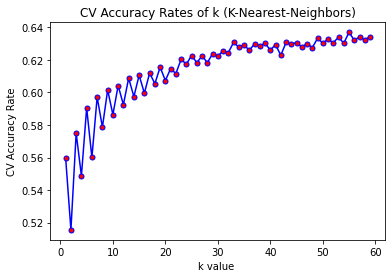

In [65]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [66]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index + 1, 'accuracy = ', value)

best k =  55 accuracy =  0.6370614035087719


In [82]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=93 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=55, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=55, p=2,
                     weights='uniform')

In [68]:
from google.colab import files
uploaded = files.upload()

Saving test_sample.csv to test_sample (1).csv


In [83]:
new_test = pd.read_csv('test_sample.csv')

In [84]:
new_test.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [85]:
# get all nominal / ordinal / Boolean features
cat_data_test = new_test[['Sex', 'FacultyName','HomeRegion']]

# get all numberic features
num_data_test = new_test.select_dtypes('number')

In [86]:
cat_data_test = pd.get_dummies(cat_data_test)
cat_data_test.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [87]:
transform_num_data_test = pd.concat([cat_data_test, num_data_test], axis=1)
transform_num_data_test.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3.05,3.50,3.11,2.35,3.11,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.45,2.23,2.40,2.38,2.44,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.11,3.04,2.50,3.00,3.69,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.75,3.55,3.90,4.00,3.96,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.88,3.10,1.78,2.90,3.19,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0


In [88]:
from  sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(transform_num_data_test)
transform_num_data_test = mms.transform(transform_num_data_test)

In [89]:
prediction = best_knn.predict(transform_num_data_test)

In [90]:
prediction

array(['Not MFU student', 'Not MFU student', 'MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'MFU student', 'MFU student',
       'Not MFU student', 'MFU student', 'Not MFU student', 'MFU student',
       'Not MFU student', 'Not MFU student', 'MFU student', 'MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'MFU student', 'Not MFU student', 'MFU student', 'MFU student',
       'Not MFU student', 'MFU student', 'Not MFU student', 'MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'MFU student', 'MFU student',
       'MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'MFU student', 'Not MFU student',
       'Not MFU student', 'MFU student', 'MFU student', 'N

In [91]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [93]:
import pickle
pickle.dump(best_knn, open('gdrive/My Drive/best_knn_v6.pkl','wb'))
pickle.dump(mms, open('gdrive/My Drive/normalization_v6.pkl','wb'))